# Data Exploration

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-09-01T00:00:51,5.30,NaN,NaN,1.77,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-09-01T00:03:23,8.00,NaN,NaN,1.83,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-09-01T00:05:59,3.43,NaN,NaN,1.70,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-09-01T00:08:29,5.40,NaN,NaN,2.00,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-09-01T00:11:00,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
584,6842,SDS011,3460,52.028,8.916,2020-09-23T23:47:59,5.23,NaN,NaN,3.73,NaN,NaN
585,6842,SDS011,3460,52.028,8.916,2020-09-23T23:50:26,4.07,NaN,NaN,3.50,NaN,NaN
586,6842,SDS011,3460,52.028,8.916,2020-09-23T23:52:52,5.67,NaN,NaN,3.60,NaN,NaN
587,6842,SDS011,3460,52.028,8.916,2020-09-23T23:55:19,6.83,NaN,NaN,3.37,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,12738.0,12738.0,1.273800e+04,1.273800e+04,12738.000000,0.0,0.0,12738.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,7.802055,NaN,NaN,4.425519,NaN,NaN
std,0.0,0.0,7.105706e-15,1.776427e-15,6.740637,NaN,NaN,4.611298,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.330000,NaN,NaN,0.300000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,4.330000,NaN,NaN,2.000000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,6.630000,NaN,NaN,3.300000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,9.370000,NaN,NaN,5.400000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-01 00:00:51,6842,SDS011,3460,52.028,8.916,5.30,NaN,NaN,1.77,NaN,NaN
2020-09-01 00:03:23,6842,SDS011,3460,52.028,8.916,8.00,NaN,NaN,1.83,NaN,NaN
2020-09-01 00:05:59,6842,SDS011,3460,52.028,8.916,3.43,NaN,NaN,1.70,NaN,NaN
2020-09-01 00:08:29,6842,SDS011,3460,52.028,8.916,5.40,NaN,NaN,2.00,NaN,NaN
2020-09-01 00:11:00,6842,SDS011,3460,52.028,8.916,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23 23:47:59,6842,SDS011,3460,52.028,8.916,5.23,NaN,NaN,3.73,NaN,NaN
2020-09-23 23:50:26,6842,SDS011,3460,52.028,8.916,4.07,NaN,NaN,3.50,NaN,NaN
2020-09-23 23:52:52,6842,SDS011,3460,52.028,8.916,5.67,NaN,NaN,3.60,NaN,NaN


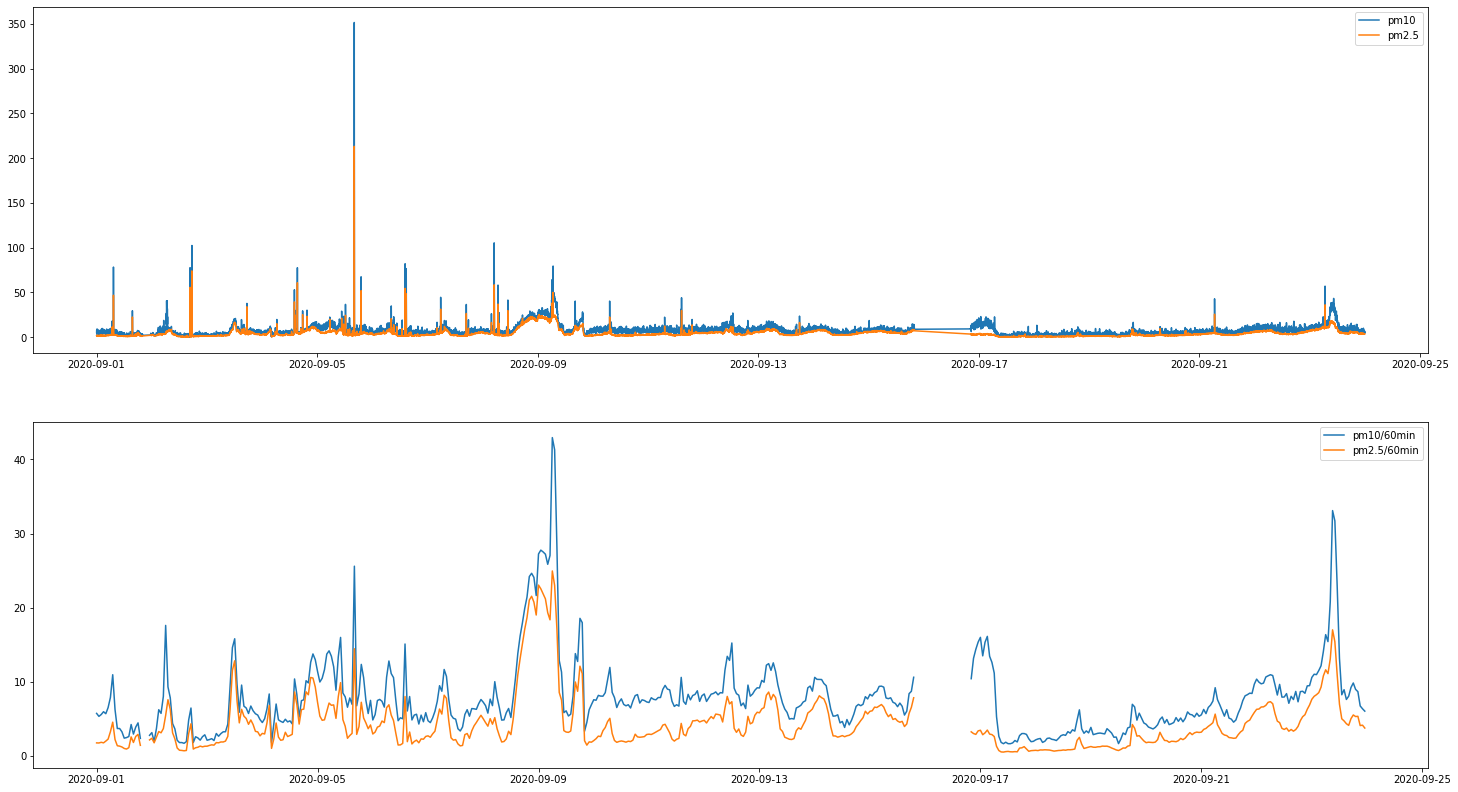

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [9]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            comp['timestamp'] = pd.to_datetime(comp['timestamp'])
            comp = comp.set_index('timestamp')
        except:
            print("\tno data")
        SensorData[sensor] = comp
    return SensorData

In [10]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList[-5:])

11224
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23
9547
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23
564
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23
31035
2020-09-05
	does not exist jet
	no data
4857
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23


In [11]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:27,4857,SDS011,2443,51.978,8.472,10.15,NaN,NaN,5.28,NaN,NaN
2020-09-05 00:09:23,4857,SDS011,2443,51.978,8.472,9.30,NaN,NaN,4.62,NaN,NaN
2020-09-05 00:14:20,4857,SDS011,2443,51.978,8.472,9.57,NaN,NaN,5.18,NaN,NaN
2020-09-05 00:19:16,4857,SDS011,2443,51.978,8.472,7.35,NaN,NaN,4.32,NaN,NaN
2020-09-05 00:24:12,4857,SDS011,2443,51.978,8.472,4.95,NaN,NaN,4.45,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-23 23:36:59,4857,SDS011,2443,51.978,8.472,9.32,NaN,NaN,3.53,NaN,NaN
2020-09-23 23:41:55,4857,SDS011,2443,51.978,8.472,3.30,NaN,NaN,2.97,NaN,NaN
2020-09-23 23:46:51,4857,SDS011,2443,51.978,8.472,7.90,NaN,NaN,3.15,NaN,NaN


## Getting a list of all sensors located in OWL

In [12]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
sensor_df = pd.DataFrame(rdata)

In [13]:
df = sensor_df.copy()

In [14]:
# longitudes
longitude_min = 8.3255 #north
longitude_max = 9.5537

# latitudes
latitude_max = 52.2396 #west
latitude_min = 51.4762

In [15]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [16]:
df = df[df['sensor'].map(lambda x: 'SDS011' in x['sensor_type'].values())]

In [17]:
df.shape

(11551, 6)

In [18]:
longitude = df['location'].apply(lambda x: x.get('longitude'))
latitude = df['location'].apply(lambda x: x.get('latitude'))

In [19]:
df = df.assign(longitude = longitude.values)
df = df.assign(latitude = latitude.values)

In [20]:
df

,id,sampling_rate,timestamp,location,sensor,sensordatavalues,longitude,latitude
0,1982478234,NaN,2020-09-24 01:46:01,"{'id': 24612, 'latitude': '48.984', 'longitude...","{'id': 38865, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611044, 'value': '4.45', 'value_ty...",8.394,48.984
1,1982478233,NaN,2020-09-24 01:46:01,"{'id': 26283, 'latitude': '49.02', 'longitude'...","{'id': 40573, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611043, 'value': '1.10', 'value_ty...",8.644,49.02
6,1982478228,NaN,2020-09-24 01:46:01,"{'id': 9357, 'latitude': '49.9', 'longitude': ...","{'id': 18455, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611030, 'value': '5.17', 'value_ty...",8.208,49.9
9,1982478225,NaN,2020-09-24 01:46:01,"{'id': 10085, 'latitude': '51.12', 'longitude'...","{'id': 19848, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611025, 'value': '2.22', 'value_ty...",6.956,51.12
11,1982478223,NaN,2020-09-24 01:46:01,"{'id': 7517, 'latitude': '48.4', 'longitude': ...","{'id': 14849, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611020, 'value': '3.60', 'value_ty...",11.77,48.4
...,...,...,...,...,...,...,...,...
46528,1982431489,NaN,2020-09-24 01:40:52,"{'id': 27454, 'latitude': '48.692', 'longitude...","{'id': 23810, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509555, 'value': '12.63', 'value_t...",8.948,48.692
46530,1982431487,NaN,2020-09-24 01:40:52,"{'id': 11323, 'latitude': '49.61', 'longitude'...","{'id': 22310, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509553, 'value': '0.10', 'value_ty...",11.016,49.61
46533,1982431484,NaN,2020-09-24 01:40:52,"{'id': 10869, 'latitude': '52.238', 'longitude...","{'id': 21416, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509546, 'value': '9.90', 'value_ty...",10.716,52.238
46538,1982431479,NaN,2020-09-24 01:40:52,"{'id': 33763, 'latitude': '53.282', 'longitude...","{'id': 47998, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509536, 'value': '10.13', 'value_t...",9.864,53.282


In [21]:
df.drop(['location', 'sampling_rate', 'id'], axis = 1, inplace = True)
df

,timestamp,sensor,sensordatavalues,longitude,latitude
0,2020-09-24 01:46:01,"{'id': 38865, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611044, 'value': '4.45', 'value_ty...",8.394,48.984
1,2020-09-24 01:46:01,"{'id': 40573, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611043, 'value': '1.10', 'value_ty...",8.644,49.02
6,2020-09-24 01:46:01,"{'id': 18455, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611030, 'value': '5.17', 'value_ty...",8.208,49.9
9,2020-09-24 01:46:01,"{'id': 19848, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611025, 'value': '2.22', 'value_ty...",6.956,51.12
11,2020-09-24 01:46:01,"{'id': 14849, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278611020, 'value': '3.60', 'value_ty...",11.77,48.4
...,...,...,...,...,...
46528,2020-09-24 01:40:52,"{'id': 23810, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509555, 'value': '12.63', 'value_t...",8.948,48.692
46530,2020-09-24 01:40:52,"{'id': 22310, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509553, 'value': '0.10', 'value_ty...",11.016,49.61
46533,2020-09-24 01:40:52,"{'id': 21416, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509546, 'value': '9.90', 'value_ty...",10.716,52.238
46538,2020-09-24 01:40:52,"{'id': 47998, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278509536, 'value': '10.13', 'value_t...",9.864,53.282


In [22]:
df['longitude'] = pd.to_numeric(df.longitude)
df['latitude'] = pd.to_numeric(df.latitude)
df = df[df.longitude <= longitude_max]
df = df[df.longitude >= longitude_min]
df = df[df.latitude <= latitude_max]
df = df[df.latitude >= latitude_min]

In [23]:
df.reset_index(inplace = True, drop = True)

In [24]:
df['SensorID'] = df['sensor'].apply(lambda x: x.get('id'))
df

,timestamp,sensor,sensordatavalues,longitude,latitude,SensorID
0,2020-09-24 01:45:58,"{'id': 38717, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278610322, 'value': '3.90', 'value_ty...",9.278,52.128,38717
1,2020-09-24 01:45:57,"{'id': 3074, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4278609890, 'value': '13.53', 'value_t...",8.748,51.716,3074
2,2020-09-24 01:45:57,"{'id': 19111, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278609713, 'value': '3.13', 'value_ty...",8.376,51.906,19111
3,2020-09-24 01:45:55,"{'id': 17382, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278609267, 'value': '3.12', 'value_ty...",8.384,51.892,17382
4,2020-09-24 01:45:55,"{'id': 5221, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4278608962, 'value': '72.00', 'value_t...",8.514,52.036,5221
...,...,...,...,...,...,...
220,2020-09-24 01:40:57,"{'id': 31262, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278511456, 'value': '2.35', 'value_ty...",9.006,52.080,31262
221,2020-09-24 01:40:56,"{'id': 21609, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278511327, 'value': '9.93', 'value_ty...",8.600,52.188,21609
222,2020-09-24 01:40:55,"{'id': 4506, 'pin': '1', 'sensor_type': {'id':...","[{'id': 4278510942, 'value': '1.87', 'value_ty...",8.794,51.728,4506
223,2020-09-24 01:40:54,"{'id': 21703, 'pin': '1', 'sensor_type': {'id'...","[{'id': 4278510266, 'value': '0.00', 'value_ty...",8.656,51.828,21703


### Plotting Sensor Locations on a map of OWL

In [25]:
boundingBox = (longitude_min, longitude_max, latitude_min, latitude_max)
boundingBox

(8.3255, 9.5537, 51.4762, 52.2396)

In [26]:
owl_map = plt.imread('map.png')

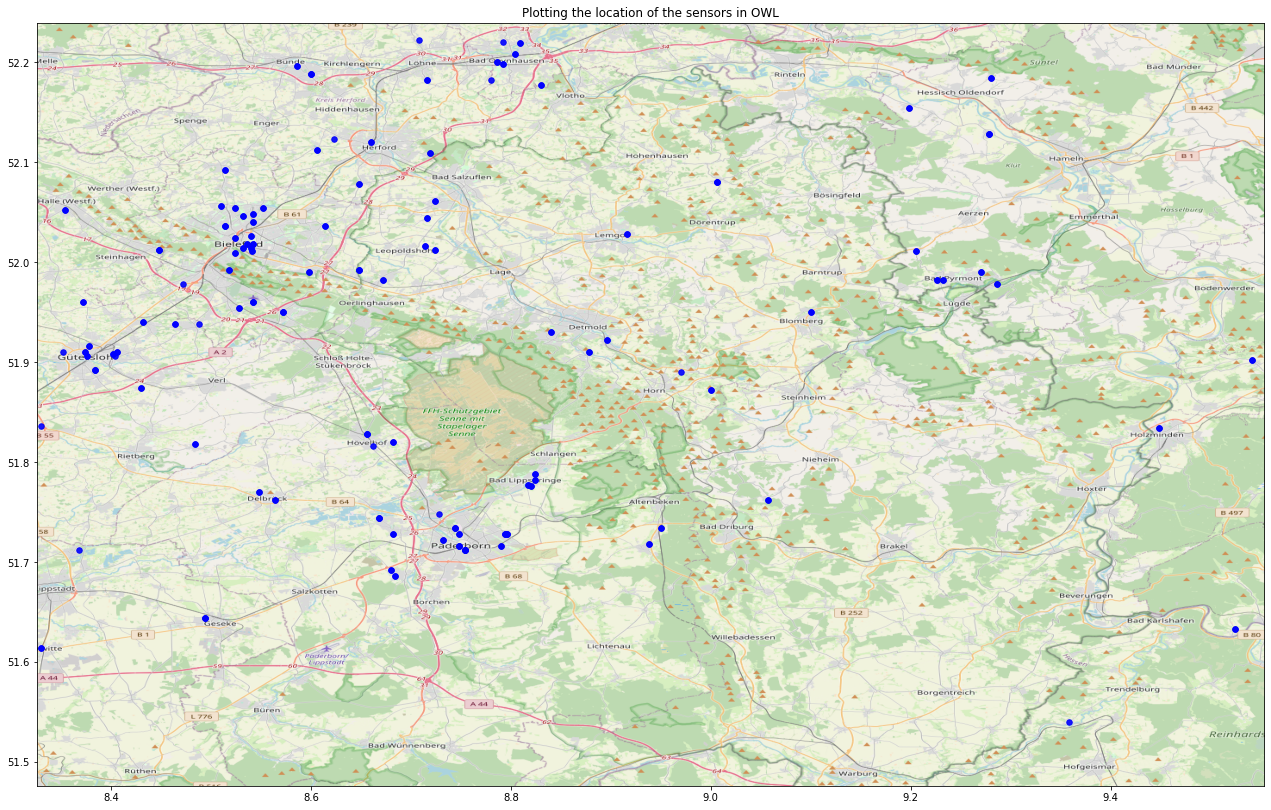

In [27]:
fig, ax = plt.subplots(figsize = (22, 40))

ax.scatter(df.longitude, df.latitude, zorder = 1, alpha = 0.9, c = 'b', s = 30)

ax.set_title('Plotting the location of the sensors in OWL')
ax.set_xlim(boundingBox[0], boundingBox[1])
ax.set_ylim(boundingBox[2], boundingBox[3])

ax.imshow(owl_map, zorder = 0, extent = boundingBox)

In [28]:
sensorList = set(df['SensorID'])
len(sensorList)

110

In [29]:
df['sensordatavalues'][0]

[{'id': 4278610322, 'value': '3.90', 'value_type': 'P1'},
 {'id': 4278610323, 'value': '2.22', 'value_type': 'P2'}]

In [30]:
df.sensordatavalues[0][0]

{'id': 4278610322, 'value': '3.90', 'value_type': 'P1'}

In [31]:
p1 = df['sensordatavalues'].apply(lambda x: x[0]).apply(lambda x: x.get('value'))
p2 = df['sensordatavalues'].apply(lambda x: x[1]).apply(lambda x: x.get('value'))

In [32]:
p1[0]

'3.90'

In [33]:
p2[0]

'2.22'

In [34]:
df['P1'] = p1
df['P2'] = p2

In [35]:
df.drop(['sensor', 'sensordatavalues'], axis = 1, inplace = True)

In [36]:
df

,timestamp,longitude,latitude,SensorID,P1,P2
0,2020-09-24 01:45:58,9.278,52.128,38717,3.90,2.22
1,2020-09-24 01:45:57,8.748,51.716,3074,13.53,4.80
2,2020-09-24 01:45:57,8.376,51.906,19111,3.13,2.47
3,2020-09-24 01:45:55,8.384,51.892,17382,3.12,2.60
4,2020-09-24 01:45:55,8.514,52.036,5221,72.00,5.70
...,...,...,...,...,...,...
220,2020-09-24 01:40:57,9.006,52.080,31262,2.35,1.35
221,2020-09-24 01:40:56,8.600,52.188,21609,9.93,2.78
222,2020-09-24 01:40:55,8.794,51.728,4506,1.87,1.77
223,2020-09-24 01:40:54,8.656,51.828,21703,0.00,0.00


In [49]:
df[['P1', 'timestamp', 'P2']]

,P1,timestamp,P2
0,3.90,2020-09-24 01:45:58,2.22
1,13.53,2020-09-24 01:45:57,4.80
2,3.13,2020-09-24 01:45:57,2.47
3,3.12,2020-09-24 01:45:55,2.60
4,72.00,2020-09-24 01:45:55,5.70
...,...,...,...
220,2.35,2020-09-24 01:40:57,1.35
221,9.93,2020-09-24 01:40:56,2.78
222,1.87,2020-09-24 01:40:55,1.77
223,0.00,2020-09-24 01:40:54,0.00
